# Exploratory Data analysis

## Objectives

In this Notebook I will perform the following:

- Identify the distribution of data in the dataset
 

- Identify outliers in the dataset

- Remove outliers from the dataset

- Identify correlation between features in the dataset.

#### Import modules

In [14]:
import pandas as pd
import numpy as np
#import piplite
#await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
file_name="m2_survey_data.csv"
df = pd.read_csv(file_name)
df.shape

(11398, 85)

In [18]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

### Distribution

In this section I will Determine how the data is distributed. Precisely The column 'ConvertedComp' contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01. This assumes 12 working months and 50 working weeks.

#### The distribution curve for the column `ConvertedComp`

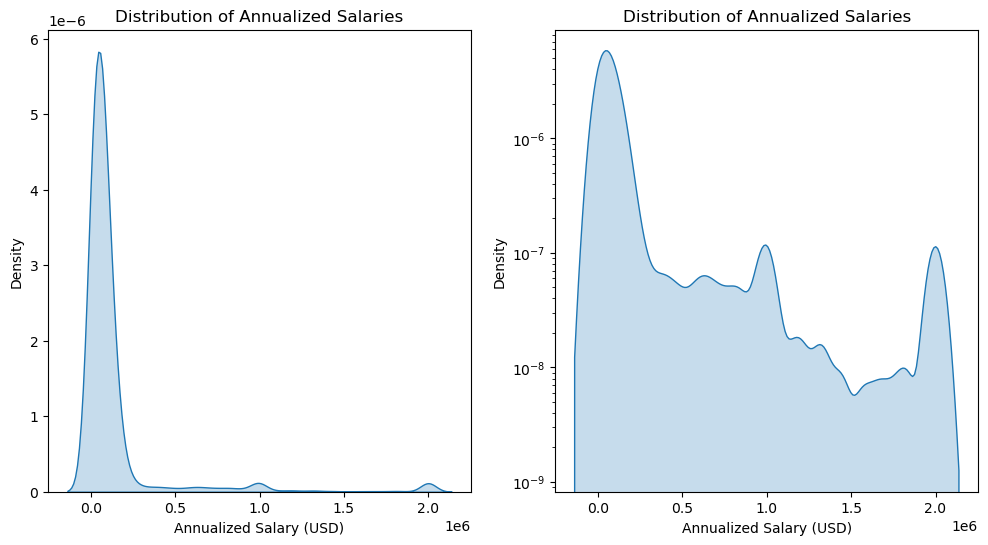

In [37]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df['ConvertedComp'], shade=True)
plt.title('Distribution of Annualized Salaries')
plt.xlabel('Annualized Salary (USD)')
plt.ylabel('Density')

# Since we have a wide range of value let's set logarithmic scale on the y-axis
plt.subplot(1, 2, 2)
sns.kdeplot(data=df['ConvertedComp'], shade=True)
plt.yscale('log')
plt.title('Distribution of Annualized Salaries')
plt.xlabel('Annualized Salary (USD)')
plt.ylabel('Density')
plt.show()

#### The histogram for the column ConvertedComp

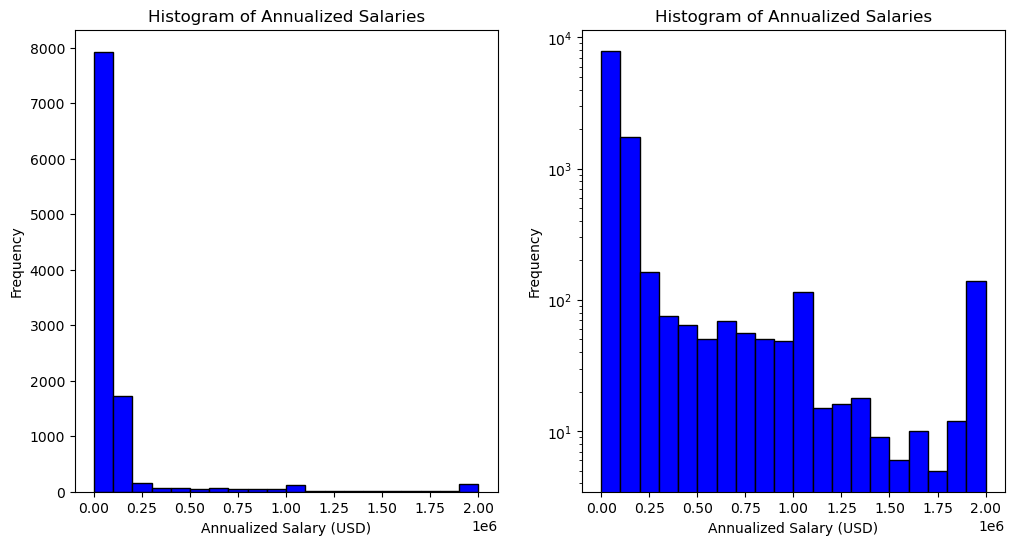

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['ConvertedComp'], bins=20, color='blue', edgecolor = "black")
plt.title('Histogram of Annualized Salaries')
plt.xlabel('Annualized Salary (USD)')
plt.ylabel('Frequency')

# Since we have a wide range of value let's set logarithmic scale on the y-axis
plt.subplot(1, 2, 2)
plt.hist(df['ConvertedComp'], bins=20, color='blue', edgecolor = "black")
plt.yscale('log')
plt.title('Histogram of Annualized Salaries')
plt.xlabel('Annualized Salary (USD)')
plt.ylabel('Frequency')
plt.show()

#### What is the median of the column `ConvertedComp`?

In [44]:
df['ConvertedComp'].median()

57745.0

#### How many responders identified themselves only as a **gender non-conforming**?

In [47]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

####  What's the median Converted Compensation of responders identified themselves only as a **Man**?

In [50]:
df_grouped = df[['ConvertedComp','Gender']]
grouped_Gender = df_grouped.groupby(['Gender'], as_index= False).median()
grouped_Gender

,Gender,ConvertedComp
0,Man,57744.0
1,"Man;Non-binary, genderqueer, or gender non-con...",59520.0
2,"Non-binary, genderqueer, or gender non-conforming",67142.0
3,Woman,57708.0
4,Woman;Man,21648.0
5,"Woman;Man;Non-binary, genderqueer, or gender n...",30244.0
6,"Woman;Non-binary, genderqueer, or gender non-c...",65535.5


#### Statistical describtion of the column **Age**

In [53]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

#### Histogram of the column **Age**

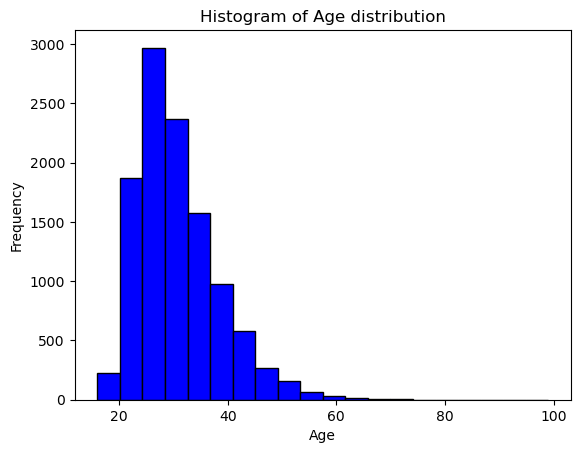

In [59]:
plt.hist(df['Age'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Outliers

#### Find out if outliers exist in the column ConvertedComp` 

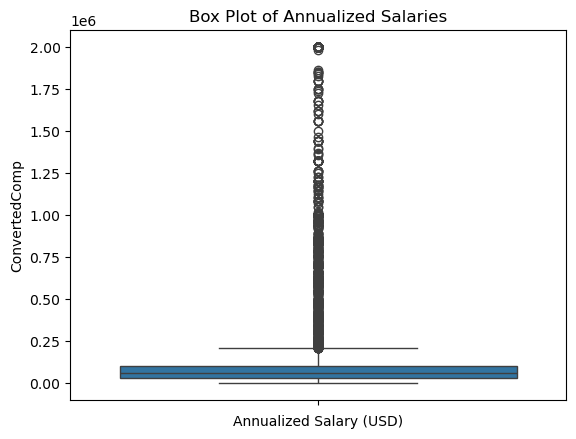

In [73]:
sns.boxplot(y=df['ConvertedComp'])
plt.title('Box Plot of Annualized Salaries')
plt.xlabel('Annualized Salary (USD)')
plt.show()

#### What's the Inter Quartile Range for the column 'ConvertedComp'

In [76]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

73132.0


#### What's the upper and lower bounds.

In [79]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("The upper bound is:", upper_bound)
print("The lower bound is:", lower_bound)

The upper bound is: 209698.0
The lower bound is: -82830.0


#### Let's find out how many outliers are there in the column 'ConvertedComp' 

In [86]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
count = outliers.count()
print("The Outliers are:\n", count)

The Outliers are:
 Respondent      879
MainBranch      879
Hobbyist        879
OpenSourcer     879
OpenSource      872
               ... 
Sexuality       852
Ethnicity       850
Dependents      873
SurveyLength    879
SurveyEase      878
Length: 85, dtype: int64


#### Let's create a new dataframe by removing the outliers from the column 'ConvertedComp' 

In [91]:
df_without_outliers = df[~df.index.isin(outliers.index)]
df_without_outliers.shape

(10519, 85)

### Correlation

#### Let's find the correlation between Age and all other numerical columns

In [95]:
# Identifying the numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

In [97]:
cor_age = df[["Respondent", "CompTotal", "ConvertedComp", "WorkWeekHrs", "CodeRevHrs", "Age" ]].corr()

print(cor_age["Age"])

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


##### Observation

**Weak correlations:** The correlation coefficients for most columns are relatively small, indicating weak or no linear relationships with "Age". 

**Positive correlation with "ConvertedComp":** There's a slightly stronger positive correlation between "ConvertedComp" and "Age", suggesting that as people get older, their reported compensation tends to increase.